In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label

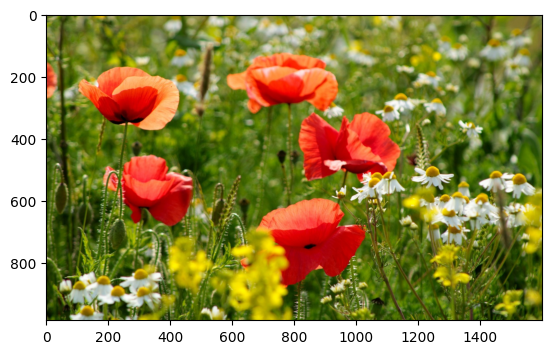

In [6]:
image = cv.imread('images/petals.jpeg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_copy = image.copy()
plt.imshow(image)

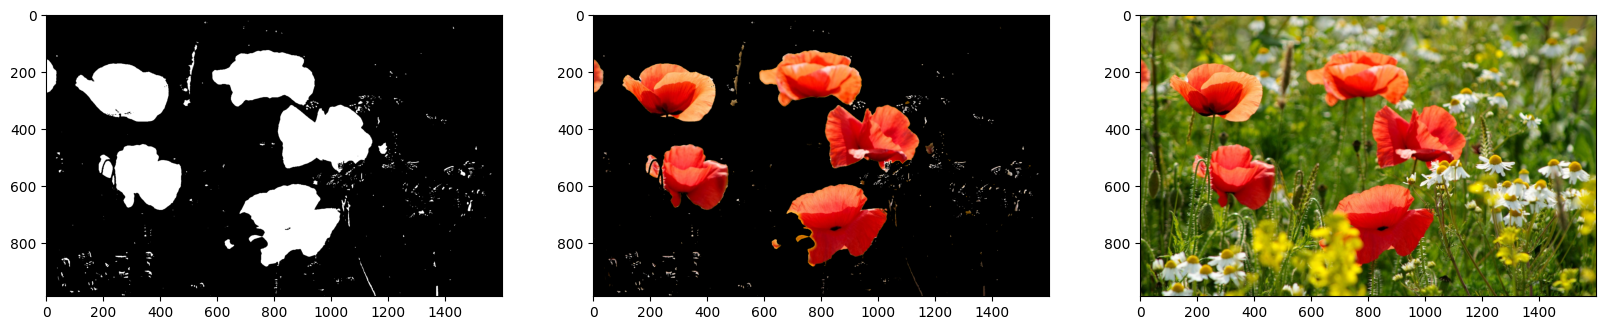

In [7]:
image = cv.cvtColor(image, cv.COLOR_RGB2HSV)
# (hMin = 20 , sMin = 0, vMin = 0), (hMax = 173 , sMax = 255, vMax = 255)
lower = np.array([20, 0, 0])
upper = np.array([173, 255, 255])

mask = cv.inRange(image, lower, upper)
mask = cv.bitwise_not(mask)

segmentation_result = cv.bitwise_and(image_copy, image_copy, mask=mask)

# plot mask, result and original image
plt.figure(figsize=[20, 20])
plt.subplot(131)
plt.imshow(mask, cmap='gray')
plt.subplot(132)
plt.imshow(segmentation_result)
plt.subplot(133)
plt.imshow(image_copy)
plt.show()

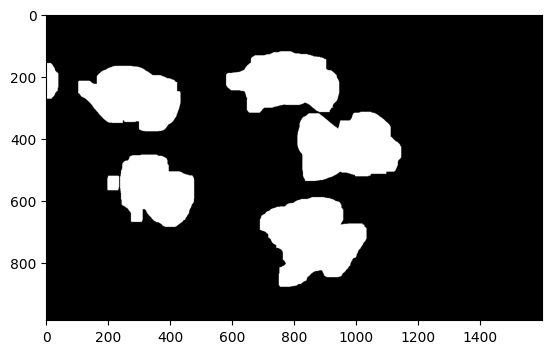

In [8]:
#Dilate
kernel = np.ones((5,5),np.uint8)
erode = cv.erode(mask, kernel, iterations = 6)
dilation = cv.dilate(erode, kernel, iterations = 8)
plt.imshow(dilation, cmap='gray')


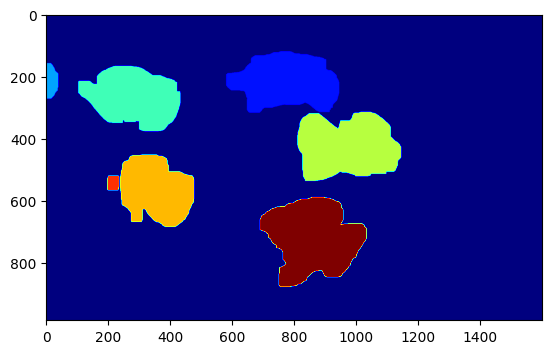

Número de objetos encontrados: 7


In [9]:
structure = np.ones((3, 3), dtype=int)
rotulos, num_objects = label(dilation, structure=structure)

plt.imshow(rotulos, cmap="jet")
plt.show()

print(f"Número de objetos encontrados: {num_objects}")

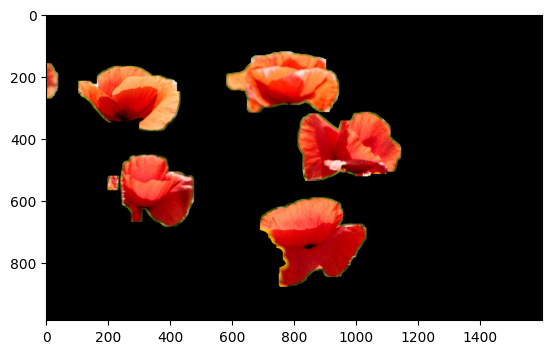

In [10]:
segmentation_result = cv.bitwise_and(image_copy, image_copy, mask=dilation)
plt.imshow(segmentation_result)